# Proyek Analisis Data: [BIKE SHARING]
- **Nama:** Akhtar Ramadhan Putra
- **Email:** m295d4ky1879@bangkit.academy
- **ID Dicoding:** https://www.dicoding.com/users/akhtar_ramadhan/

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berpengaruh untuk jumlah sepeda yang disewa?
- Apakah musim berpengaruh untuk jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [35]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

## Data Wrangling

### Gathering Data

In [36]:
from google.colab import files

# Upload file zip datasetnya
uploaded = files.upload()

# Mendapatkan nama file yang diupload
file_name = next(iter(uploaded))

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files_folder')

Saving bike-sharing-dataset.zip to bike-sharing-dataset (1).zip


### Assessing Data

In [38]:
df = pd.read_csv('/content/extracted_files_folder/bike-sharing-dataset/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [40]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [41]:
# convert kolom 'dteday' ke format datetime
df['dteday']= pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [42]:
# mencari baris dengan nilai NaN
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

In [43]:
df.drop(columns=['instant', 'temp', 'casual', 'registered'], inplace=True)

In [44]:
df.dropna()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.226642,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.255046,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.242400,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.231700,0.483333,0.350754,1796


In [45]:
df['mnth'] = df['mnth'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
                                   9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

In [46]:
df['season'] = df['season'].map({1:"semi", 2:"panas", 3:"gugur", 4:"salju"})

In [47]:
df['weathersit'] = df['weathersit'].map({1:"cerah", 2:"berawan", 3:"hujan ringan", 4:"hujan deras"})

## Exploratory Data Analysis (EDA)

### Explore ...

<Axes: xlabel='weathersit', ylabel='cnt'>

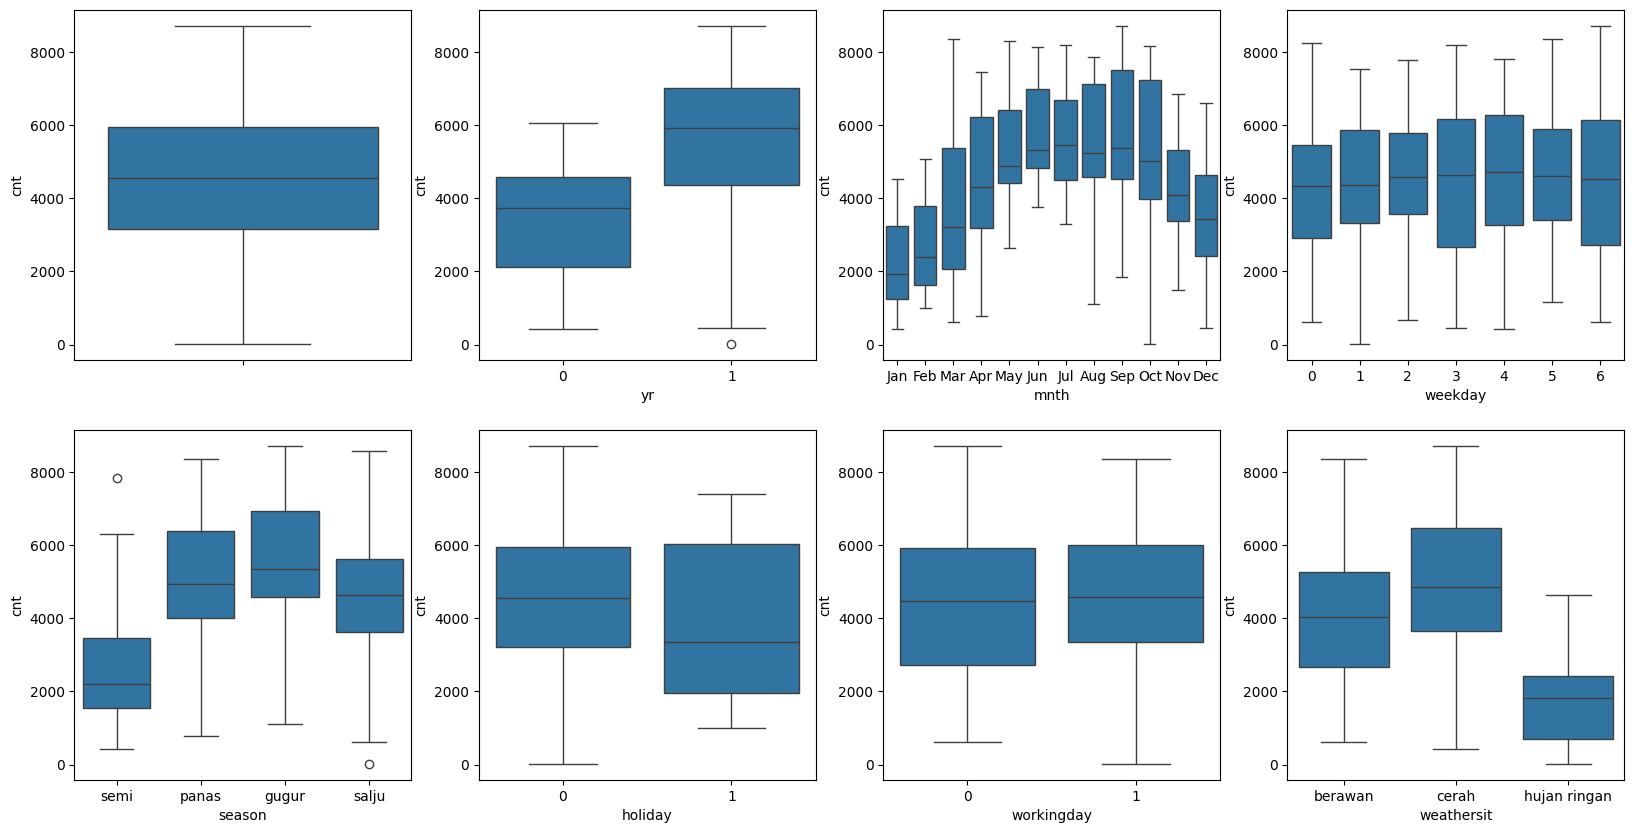

In [49]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20, 10)

sns.boxplot(data=df, y='cnt', ax=ax1)
sns.boxplot(data=df, x='yr', y='cnt', ax=ax2)
sns.boxplot(data=df, x='mnth', y='cnt', ax=ax3)
sns.boxplot(data=df, x='weekday', y='cnt', ax=ax4)
sns.boxplot(data=df, x='season', y='cnt', ax=ax5)
sns.boxplot(data=df, x='holiday', y='cnt', ax=ax6)
sns.boxplot(data=df, x='workingday', y='cnt', ax=ax7)
sns.boxplot(data=df, x='weathersit', y='cnt', ax=ax8)

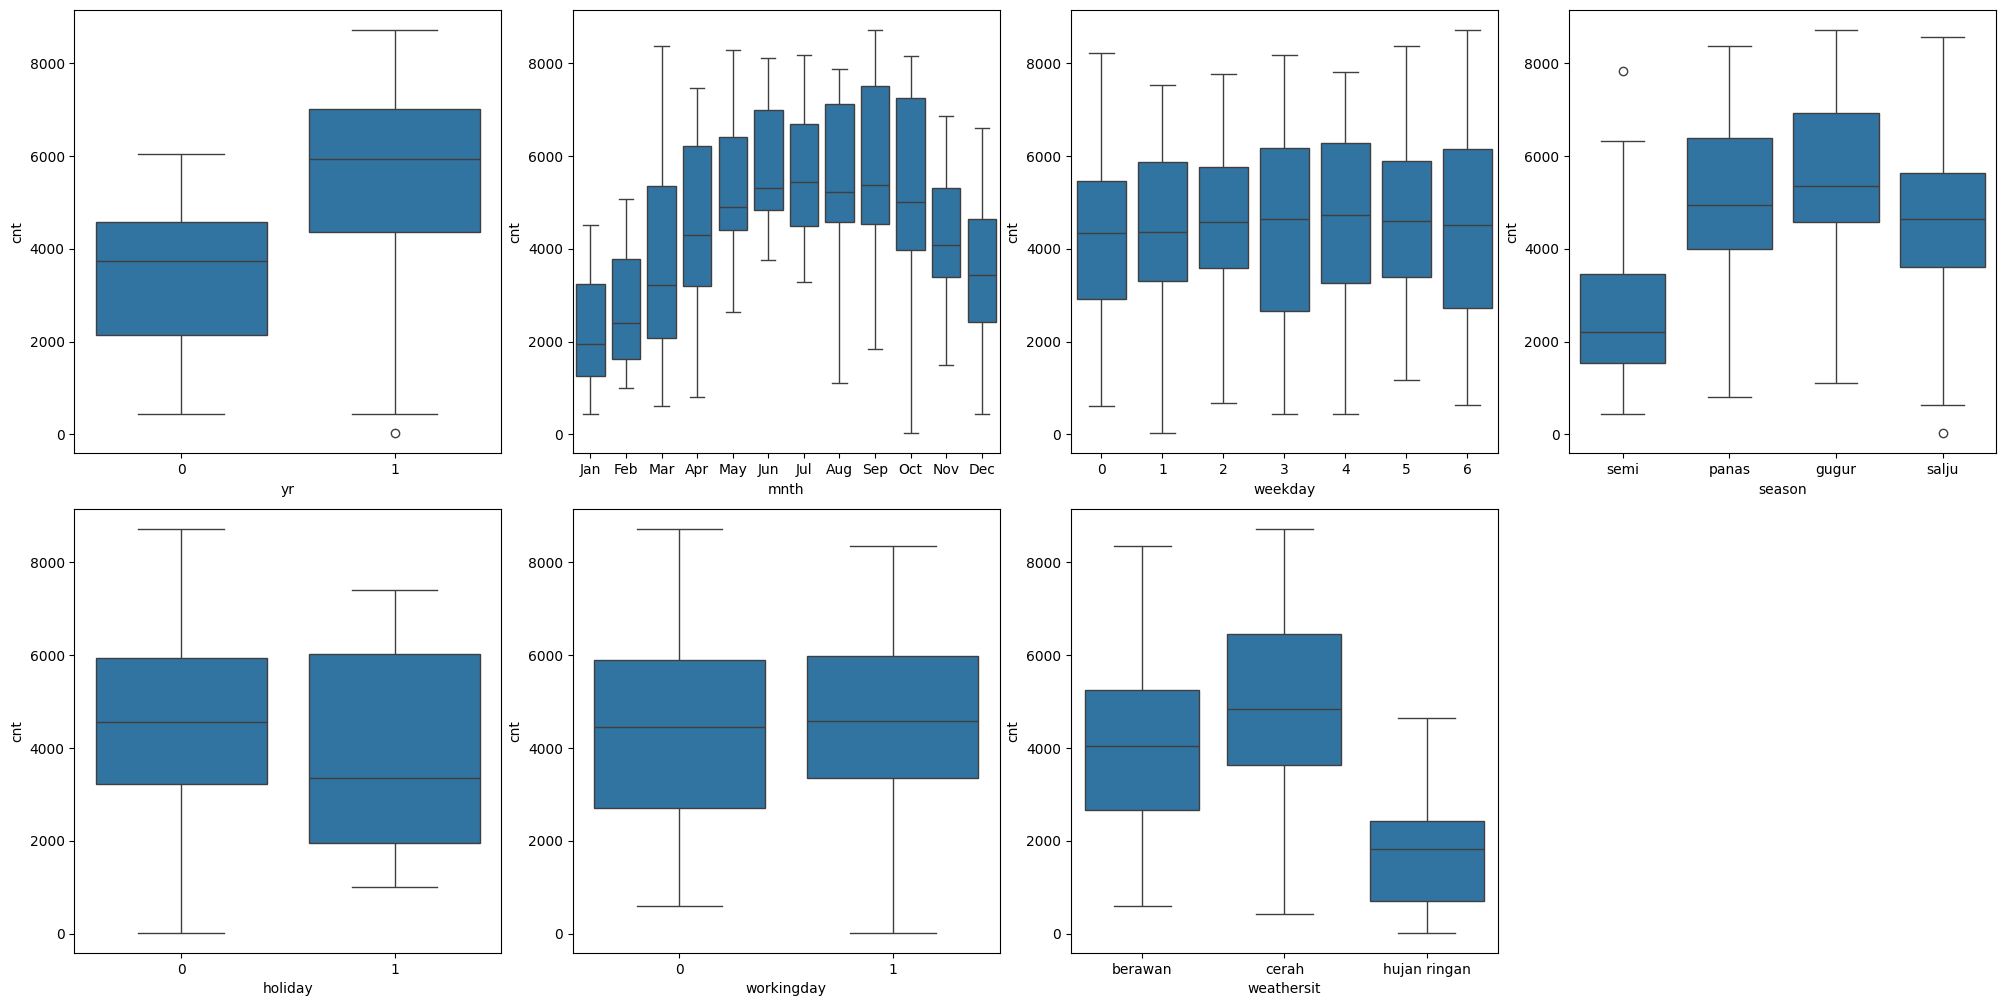

In [53]:
categorical_cols = ['yr', 'mnth', 'weekday', 'season', 'holiday', 'workingday', 'weathersit']
plt.figure(figsize = (20, 10))

for i in enumerate(categorical_cols):
    plt.subplot(2, 4, i[0]+1)
    plt.tight_layout(pad=0.5)
    sns.boxplot(x = i[1], y= 'cnt', data = df)

<ipython-input-59-adb74ae6728d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.8, ax=ax);


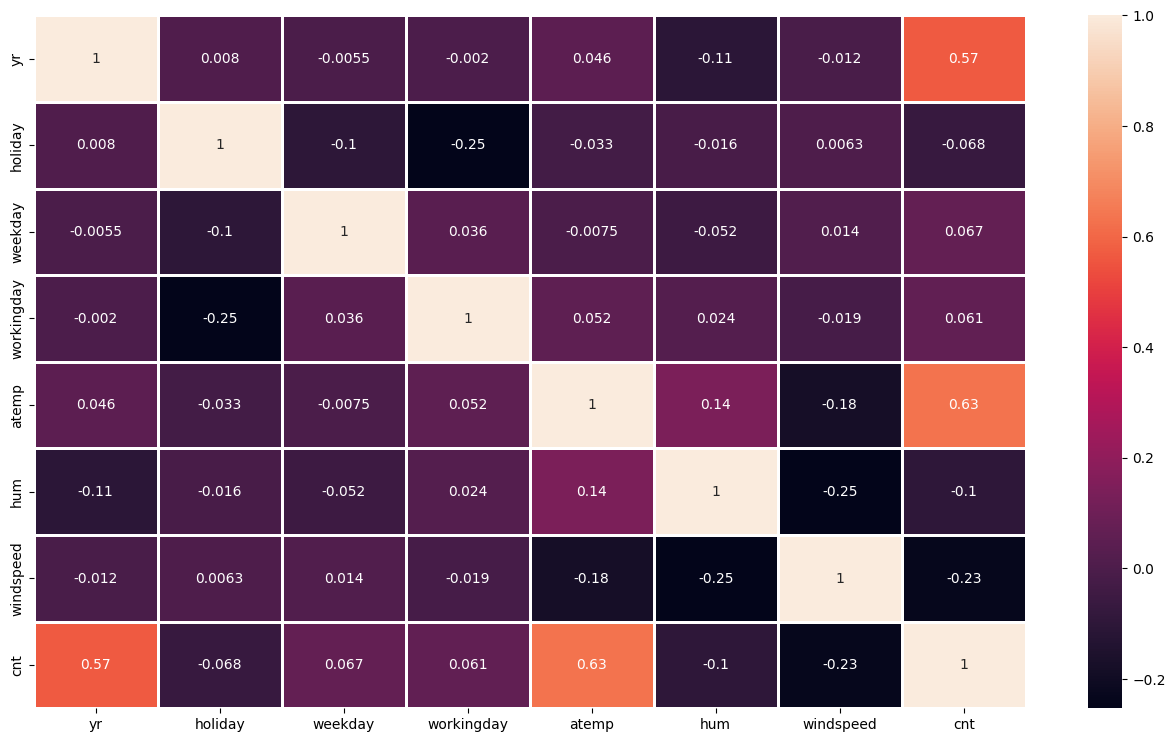

In [59]:
# matriks korelasi menggunakan heatmap
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, linewidths=.8, ax=ax);

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca berpengaruh untuk jumlah sepeda yang disewa?

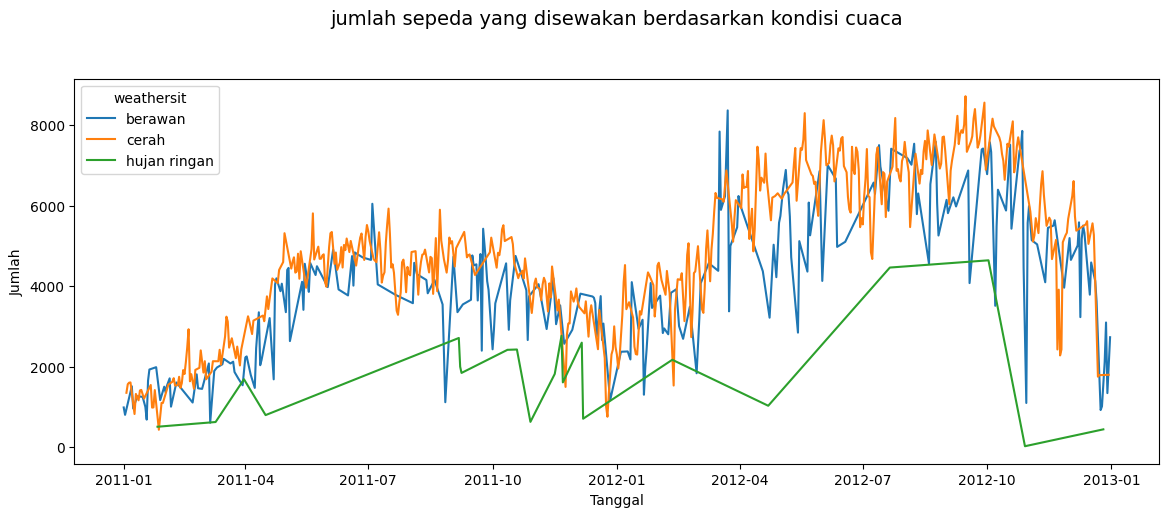

In [56]:
fig, ax = plt.subplots(figsize=(14,5)) # create figure with figsize in inches
g3 = sns.lineplot(data=df, x="dteday", y="cnt",hue="weathersit");

# axis lablel
plt.xlabel("Tanggal")
plt.ylabel("Jumlah")

# plot title
# add the title, title size, and the distance between title and plot
plt.title("jumlah sepeda yang disewakan berdasarkan kondisi cuaca", size=14, y=1.12)
plt.show(g3);

### Pertanyaan 2:Apakah musim berpengaruh untuk jumlah sepeda yang disewa?

<ipython-input-58-7bf788bb5afc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g4 = sns.barplot(data=df,x="season",  y="cnt", hue="yr", palette="rocket",  ci=None)


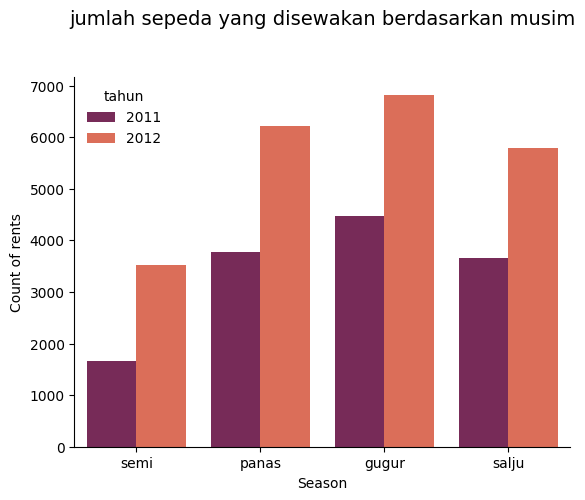

In [58]:
g4 = sns.barplot(data=df,x="season",  y="cnt", hue="yr", palette="rocket",  ci=None)
sns.despine(top=True, right=True, left=False, bottom=False) # remove border

plt.ylabel('jumlah')
plt.xlabel('musim')
plt.title("jumlah sepeda yang disewakan berdasarkan musim", size=14, y=1.12)

plt.xticks([0,1,2,3],['semi', 'panas', 'gugur', 'salju'])

plt.legend(title='tahun', loc='best', labels=['2011', '2012'], frameon=False)
plt.show(g4);

## Conclusion

- Cuaca berpengaruh terhadap jumlah sepeda yang disewakan. Orang-orang cenderung untuk menyewa sepeda di cuaca yang  berawan dan cerah dan sedikit orang yang menyewa epeda di saat hujan ringan. Ketika hujan deras, tidak ada seorangpun yaang menyewa sepeda.
- Musim berpengaruh terhadap jumlah sepeda yang diswakan. Kenapa di musim semi angka sepeda yang disewakan sangat sedikit kalau dibandingkan dengan musim lain? Karena di musim semi sering terjadi hujan deras yang menyebabkan orang-orang tidak mau menyewa sepeda. Musim yang paling laris adalah musim gugur karena pada musim gugur, cuara cenderung bersahabat untuk bersepeda sehingga banyak orang yang menyewa sepeda pada musim gugur